### This script is to conduct statistical analysis of  precipitation and temperature from the downscaled GCMs with MACA at the Frio basin


Note:
  Input: the daily precipitation and temperature at the contributing and recahrge zones at the Frio basin

the csv files are located at ..\dataPre and ..\dataT

### Section 1: Load some general python modoles

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd


In [2]:
import os, glob
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Section 2: Load the class of data analysis customized for the Frio basin 


The class is included in the python code, dataanalysis.py


In [4]:

from DataAnalysis import Macadata

In [5]:
### get the current file path

filepath=os.getcwd()

In [6]:
filepath

'D:\\downscaled GCMS\\MACA\\friodataanalysis'

### Section 3: Use the class to load the data for the Frio basin

In [7]:
### define objects for 2 RCPs and two zones


Friorcp45rch=Macadata('Frio',filepath,'Recharge','rcp45',False)#,monthlyP,monthlyT,dailyP,dailyT)
Friorcp85rch=Macadata('Frio',filepath,'Recharge','rcp85',False)#,monthlyP,monthlyT,dailyP,dailyT)
Friorcp45contr=Macadata('Frio',filepath,'Contributing','rcp45',False)#,monthlyP,monthlyT,dailyP,dailyT)
Friorcp85contr=Macadata('Frio',filepath,'Contributing','rcp85',False)#,monthlyP,monthlyT,dailyP,dailyT)


In [8]:
### use the method to load the monthly data

Friorcp45rch.obtain_monthlyData()
Friorcp85rch.obtain_monthlyData()
Friorcp45contr.obtain_monthlyData()
Friorcp85contr.obtain_monthlyData()


In [9]:
### check the data
Friorcp45rch.monthlyP.head()

,bcc-csm1-1-m,bcc-csm1-1,BNU-ESM,CanESM2,CCSM4,CNRM-CM5,CSIRO-Mk3-6-0,GFDL-ESM2G,GFDL-ESM2M,HadGEM2-CC365,HadGEM2-ES365,inmcm4,IPSL-CM5A-LR,IPSL-CM5A-MR,IPSL-CM5B-LR,MIROC-ESM-CHEM,MIROC-ESM,MIROC5,MRI-CGCM3,NorESM1-M
Datetime,,,,,,,,,,,,,,,,,,,,
1950-01-31,2.799241,0.662550,31.594031,22.174592,50.405273,49.054047,82.817927,62.984135,8.577674,34.237891,15.992530,10.417956,46.931088,40.325625,20.359194,74.605355,40.646405,19.374894,31.879474,4.165040
1950-02-28,26.640088,8.898688,33.705416,27.101490,3.591848,51.330559,36.854331,43.316329,13.818271,11.979459,9.878476,21.767006,9.190551,62.664302,44.937998,7.451332,0.052892,25.329382,16.432421,11.721182
1950-03-31,11.846649,217.516313,7.490644,42.201301,42.809074,25.722152,53.310566,47.442027,59.215027,28.006281,23.912226,83.892817,46.809418,32.205854,36.396428,21.508371,33.465822,21.952965,31.279660,97.301836
1950-04-30,26.836054,37.835259,23.393186,27.873196,50.805677,207.643823,13.267016,30.552827,0.000000,5.925880,15.670991,15.795307,44.951902,118.268578,28.720408,89.103757,122.057007,79.066827,72.004585,97.449158
1950-05-31,56.968786,89.162195,13.915323,72.484048,52.695503,98.764078,94.420522,74.078856,100.128343,131.668362,53.959036,66.534304,53.820687,280.192054,2.227382,11.136474,12.862425,49.161703,41.424195,43.096397


bcc-csm1-1-m bcc-csm1-1
BNU-ESM CanESM2
CCSM4 CNRM-CM5


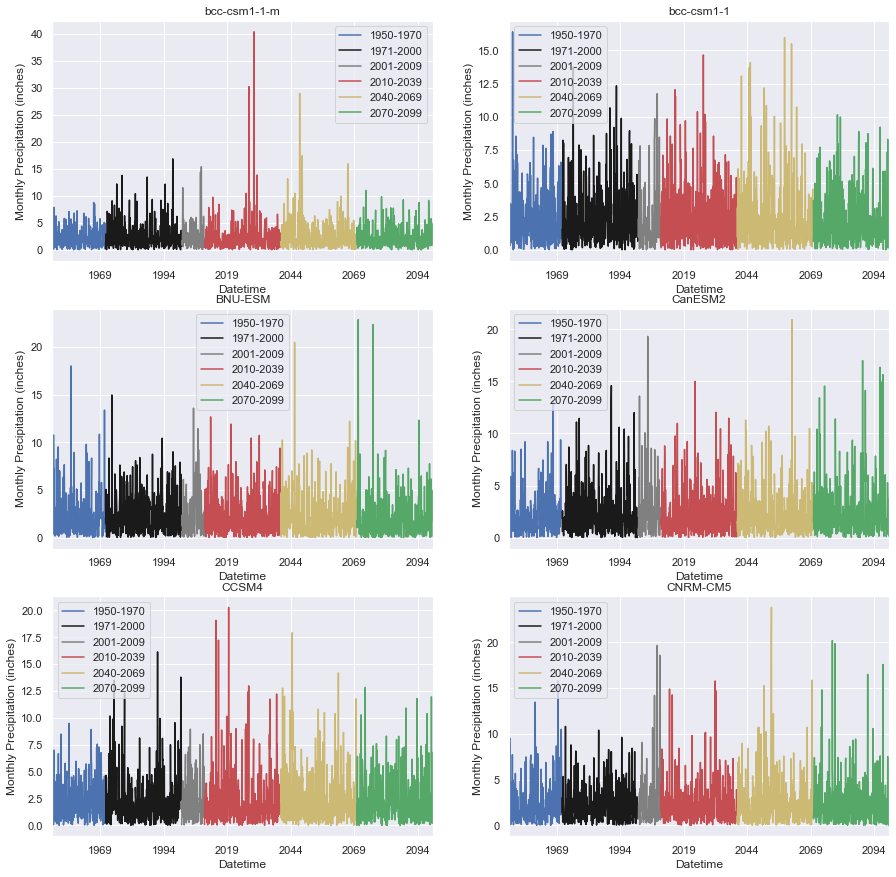

In [10]:
### Plot monthly precipitaiton at the recharge zone of the first 6 MACA models with RCP4.5 
Friorcp45rch.plotPT(ntot=3,istart=0,p=True,ylabel='Monthly Precipitation (inches)')

bcc-csm1-1-m bcc-csm1-1
BNU-ESM CanESM2
CCSM4 CNRM-CM5


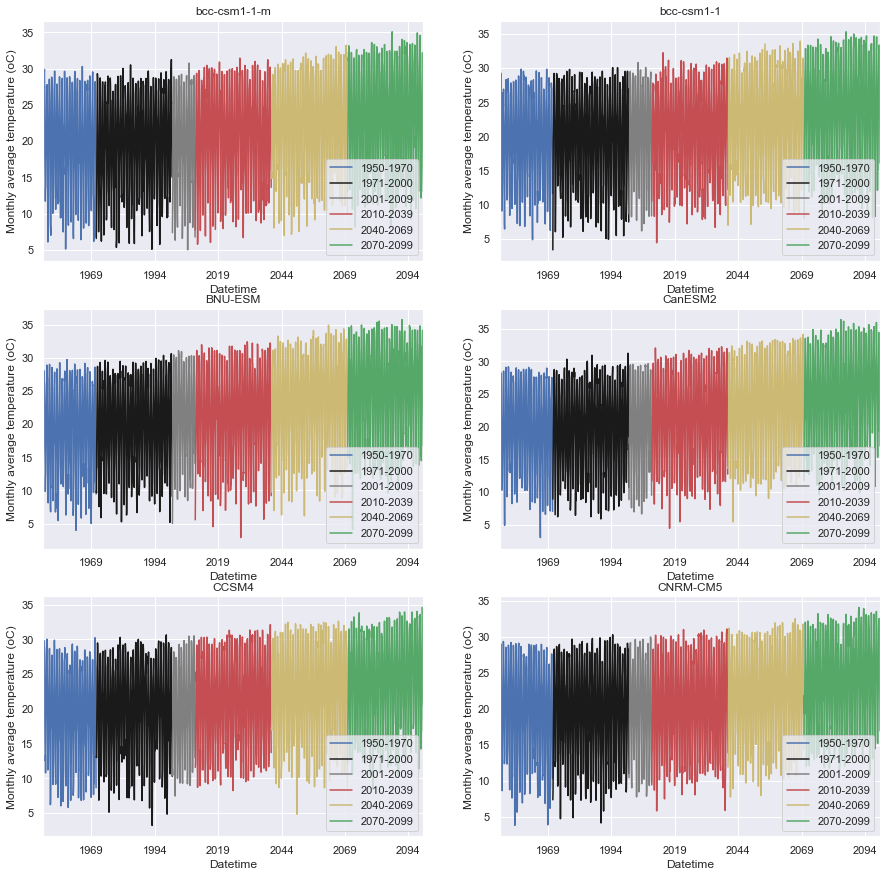

In [11]:
### Plot monthly temperature at the recharge zone of the first 6 MACA models with RCP8.5 
Friorcp85rch.plotPT(ntot=3,istart=0,p=False,ylabel='Monthly average temperature (oC)')

###  Section 4:  Calculate annula mean and seasonal mean for precipitation and temperature at different time periods, different RCPs and zones (recahrge and contributing)

In [12]:
### annal mean and seasonal mean for rcp4.5 at the recahrge zone
pre_rch_annualmean_rcp45,pre_rch_seasonmean_rcp45=Friorcp45rch.processmacapre()
pre_rch_annualmean_rcp45=pre_rch_annualmean_rcp45*0.0393701   # from mm to inches
pre_rch_seasonmean_rcp45.iloc[:,:4]=pre_rch_seasonmean_rcp45.iloc[:,:4]*0.0393701  # from mm to inches
t_rch_annualmean_rcp45,t_rch_seasonmean_rcp45=Friorcp45rch.processmacaTempr()


In [13]:
### adding the columns to the dataframe
pre_rch_annualmean_rcp45.loc[:,'rcp']='rcp45'
pre_rch_seasonmean_rcp45.loc[:,'rcp']='rcp45'
t_rch_annualmean_rcp45.loc[:,'rcp']='rcp45'
t_rch_seasonmean_rcp45.loc[:,'rcp']='rcp45'
pre_rch_annualmean_rcp45.loc[:,'zone']='Recharge Zone'
pre_rch_seasonmean_rcp45.loc[:,'zone']='Recharge Zone'
t_rch_annualmean_rcp45.loc[:,'zone']='Recharge Zone'
t_rch_seasonmean_rcp45.loc[:,'zone']='Recharge Zone'


In [14]:
### annal mean and seasonal mean for rcp8.5 at the recahrge zone

pre_rch_annualmean_rcp85,pre_rch_seasonmean_rcp85=Friorcp85rch.processmacapre()
pre_rch_annualmean_rcp85=pre_rch_annualmean_rcp85*0.0393701
pre_rch_seasonmean_rcp85.iloc[:,:4]=pre_rch_seasonmean_rcp85.iloc[:,:4]*0.0393701  # convert to inches
t_rch_annualmean_rcp85,t_rch_seasonmean_rcp85=Friorcp85rch.processmacaTempr()

In [15]:
pre_rch_annualmean_rcp85.loc[:,'rcp']='rcp85'
pre_rch_seasonmean_rcp85.loc[:,'rcp']='rcp85'
t_rch_annualmean_rcp85.loc[:,'rcp']='rcp85'
t_rch_seasonmean_rcp85.loc[:,'rcp']='rcp85'

pre_rch_annualmean_rcp85.loc[:,'zone']='Recharge Zone'
pre_rch_seasonmean_rcp85.loc[:,'zone']='Recharge Zone'
t_rch_annualmean_rcp85.loc[:,'zone']='Recharge Zone'
t_rch_seasonmean_rcp85.loc[:,'zone']='Recharge Zone'

In [16]:
### annal mean and seasonal mean for rcp8.5 at the contributing zone
pre_contr_annualmean_rcp85,pre_contr_seasonmean_rcp85=Friorcp85contr.processmacapre()
pre_contr_annualmean_rcp85=pre_contr_annualmean_rcp85*0.0393701
pre_contr_seasonmean_rcp85.iloc[:,:4]=pre_contr_seasonmean_rcp85.iloc[:,:4]*0.0393701  # convert to inches
t_contr_annualmean_rcp85,t_contr_seasonmean_rcp85=Friorcp85contr.processmacaTempr()

In [17]:
pre_contr_annualmean_rcp85.loc[:,'rcp']='rcp85'
pre_contr_seasonmean_rcp85.loc[:,'rcp']='rcp85'
t_contr_annualmean_rcp85.loc[:,'rcp']='rcp85'
t_contr_seasonmean_rcp85.loc[:,'rcp']='rcp85'

pre_contr_annualmean_rcp85.loc[:,'zone']='Contributing Zone'
pre_contr_seasonmean_rcp85.loc[:,'zone']='Contributing Zone'
t_contr_annualmean_rcp85.loc[:,'zone']='Contributing Zone'
t_contr_seasonmean_rcp85.loc[:,'zone']='Contributing Zone'

In [18]:
### annal mean and seasonal mean for rcp4.5 at the contributing zone
pre_contr_annualmean_rcp45,pre_contr_seasonmean_rcp45=Friorcp45contr.processmacapre()
pre_contr_annualmean_rcp45=pre_contr_annualmean_rcp45*0.0393701
pre_contr_seasonmean_rcp45.iloc[:,:4]=pre_contr_seasonmean_rcp45.iloc[:,:4]*0.0393701  # convert to inches
t_contr_annualmean_rcp45,t_contr_seasonmean_rcp45=Friorcp45contr.processmacaTempr()

In [19]:
pre_contr_annualmean_rcp45.loc[:,'rcp']='rcp45'
pre_contr_seasonmean_rcp45.loc[:,'rcp']='rcp45'
t_contr_annualmean_rcp45.loc[:,'rcp']='rcp45'
t_contr_seasonmean_rcp45.loc[:,'rcp']='rcp45'

pre_contr_annualmean_rcp45.loc[:,'zone']='Contributing Zone'
pre_contr_seasonmean_rcp45.loc[:,'zone']='Contributing Zone'
t_contr_annualmean_rcp45.loc[:,'zone']='Contributing Zone'
t_contr_seasonmean_rcp45.loc[:,'zone']='Contributing Zone'

In [20]:
### combining the results into 4 data frames

preannualmean=pd.concat([pre_rch_annualmean_rcp45,pre_rch_annualmean_rcp85,pre_contr_annualmean_rcp45,pre_contr_annualmean_rcp85])

preseasonmean=pd.concat([pre_rch_seasonmean_rcp45,pre_rch_seasonmean_rcp85,pre_contr_seasonmean_rcp45,pre_contr_seasonmean_rcp85])

tannualmean=pd.concat([t_rch_annualmean_rcp45,t_rch_annualmean_rcp85,t_contr_annualmean_rcp45,t_contr_annualmean_rcp85])

tseasonmean=pd.concat([t_rch_seasonmean_rcp45,t_rch_seasonmean_rcp85,t_contr_seasonmean_rcp45,t_contr_seasonmean_rcp85])



In [21]:
def calculatingannualmeanpercentage(dfo):
    ## to calculate percentage of the three periods to the baseline period
    df=dfo.copy()
    lst1=[]
    lst2=[]
    lst3=[]    
    for idx, row in df.iterrows():
        lst1.append(row['2010-2039']/row['1971-2000']*100)
        lst2.append(row['2040-2069']/row['1971-2000']*100)
        lst3.append(row['2070-2099']/row['1971-2000']*100)

    df.loc[:,'2010-2039']=lst1
    df.loc[:,'2040-2069']=lst2
    df.loc[:,'2070-2099']=lst3
    
    df=df.drop(['1971-2000','1950-2005'],axis=1)

    return df

In [22]:
def calculatingseasonalmeanpercentage(df):
    ## to calculate percentage of the three periods to the baseline period
    dfo=df[df['period']=='1971-2000']
   # print(dfo)
    #dfp=df[df['period'].isin(['2010-2039','2040-2069','2070-2099'])]
    finaldf=pd.DataFrame()
    for period in ['2010-2039','2040-2069','2070-2099']:
        #dfp=df[df['period']==period]
        for rcp in ['rcp45','rcp85']:
            for zone in ['Recharge Zone', 'Contributing Zone']:
                    
                tempdf=df[(df['period']==period) & (df['rcp']==rcp) & (df['zone']==zone)].loc[:,['Winter','Spring','Summer','Fall']] 
                tempdfo=dfo[(dfo['rcp']==rcp) & (dfo['zone']==zone)].loc[:,['Winter','Spring','Summer','Fall']] 
                tempdf.columns=['Winter_f','Spring_f','Summer_f','Fall_f']
                tempdfo.columns=['Winter_h','Spring_h','Summer_h','Fall_h']
#                print(tempdfo)
                tmdf=pd.concat([tempdf,tempdfo],axis=1)
               # print(tmdf.columns)
              #  print(tmdf)
                tmdf.loc[:,'Percent_winter']=tmdf.loc[:,'Winter_f']/tmdf.loc[:,'Winter_h']*100
                tmdf.loc[:,'Percent_spring']=tmdf.loc[:,'Spring_f']/tmdf.loc[:,'Spring_h']*100
                tmdf.loc[:,'Percent_summer']=tmdf.loc[:,'Summer_f']/tmdf.loc[:,'Summer_h']*100
                tmdf.loc[:,'Percent_fall']=tmdf.loc[:,'Fall_f']/tmdf.loc[:,'Fall_h']*100
                
                newdf=tmdf[['Percent_winter','Percent_spring','Percent_summer','Percent_fall']]  
               # print(newdf)
                newdf.loc[:,'period']=period
                newdf.loc[:,'rcp']=rcp
                newdf.loc[:,'zone']=zone
                if len(finaldf)==0:
                    finaldf=newdf.copy()
                else:
                    finaldf=pd.concat([finaldf,newdf],axis=0)
                #break
            #break
        
        #break    
    return finaldf

In [23]:
### calculate percentage of the three periods to the baseline period 
percpreannualmean=calculatingannualmeanpercentage(preannualmean.copy())
perctannualmean=calculatingannualmeanpercentage(tannualmean.copy())

percpreseasonmean=calculatingseasonalmeanpercentage(preseasonmean.copy())

perctseasonmean=calculatingseasonalmeanpercentage(tseasonmean.copy())


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
### Output the 8 data frames to the output folder

preannualmean.to_csv(r'..\output\annualmeanPre.csv')
preseasonmean.to_csv(r'..\output\seasonmeanPre.csv')

tannualmean.to_csv(r'..\output\annualmeanTemperature.csv')
tseasonmean.to_csv(r'..\output\seasonmeanPemperature.csv')

percpreannualmean.to_csv(r'..\output\percannualmeanPre.csv')
percpreseasonmean.to_csv(r'..\output\percseasonmeanPre.csv')

perctannualmean.to_csv(r'..\output\percannualmeanTemperature.csv')
perctseasonmean.to_csv(r'..\output\percseasonmeanPemperature.csv')


###  Section 5: Reformat the 4 data frames for visualizing with Seaborn module

In [25]:
preannualmean.index.name='macamodel'
preannualmean.reset_index(inplace=True)
preannualmean= preannualmean.melt(id_vars=['macamodel','rcp','zone'], var_name='period', value_name='annual mean P (in)')
tannualmean.index.name='macamodel'
tannualmean.reset_index(inplace=True)
tannualmean= tannualmean.melt(id_vars=['macamodel','rcp','zone'], var_name='period', value_name='annual mean T(oC)')
preseasonmean.index.name='macamodel'
preseasonmean.reset_index(inplace=True)
preseasonmean= preseasonmean.melt(id_vars=['macamodel','rcp','zone','period'], var_name='season', value_name='seasonal mean P (in)')
tseasonmean.index.name='macamodel'
tseasonmean.reset_index(inplace=True)
tseasonmean= tseasonmean.melt(id_vars=['macamodel','rcp','zone','period'], var_name='season', value_name='seasonal mean T (oC)')

In [26]:
percpreannualmean.index.name='macamodel'
percpreannualmean.reset_index(inplace=True)
percpreannualmean= percpreannualmean.melt(id_vars=['macamodel','rcp','zone'], var_name='period', value_name='annual mean P (%)')
perctannualmean.index.name='macamodel'
perctannualmean.reset_index(inplace=True)
perctannualmean= perctannualmean.melt(id_vars=['macamodel','rcp','zone'], var_name='period', value_name='annual mean T (%)')
percpreseasonmean.index.name='macamodel'
percpreseasonmean.reset_index(inplace=True)
percpreseasonmean= percpreseasonmean.melt(id_vars=['macamodel','rcp','zone','period'], var_name='season', value_name='seasonal mean P (%)')
perctseasonmean.index.name='macamodel'
perctseasonmean.reset_index(inplace=True)
perctseasonmean= perctseasonmean.melt(id_vars=['macamodel','rcp','zone','period'], var_name='season', value_name='seasonal mean T (%)')

In [27]:
### save the reformated dataframes to the output folder
#preseasonmean.to_csv(r'..\output\Pre_Seasonmean_singlecolumn.csv',index=False)
#preannualmean.to_csv(r'..\output\Pre_Annualmean_singlecolumn.csv',index=False)
#tseasonmean.to_csv(r'..\output\Temp_Seasonmean_singlecolumn.csv',index=False)
#tannualmean.to_csv(r'..\output\Temp_Annualmean_singlecolumn.csv',index=False)




###  Section 6: Visualizing the results

### Section 6.1 Plot the mean precipitation and temperature

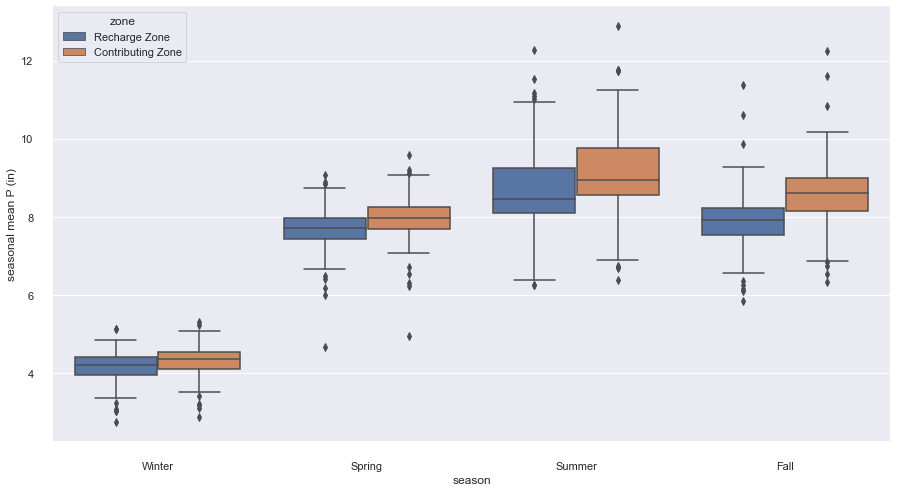

In [28]:
### plot the seasonal mean precipitation at the recharge zone and contributing zone for all the periods and the 20 MACA models with RCP4.5
fig_dims=(15,8)
fig,ax=plt.subplots(figsize=fig_dims)
sns.boxplot(x="season", y="seasonal mean P (in)",
            hue="zone", 
            data=preseasonmean[preseasonmean['rcp']=='rcp45'],ax=ax)
sns.despine(offset=10, trim=True)

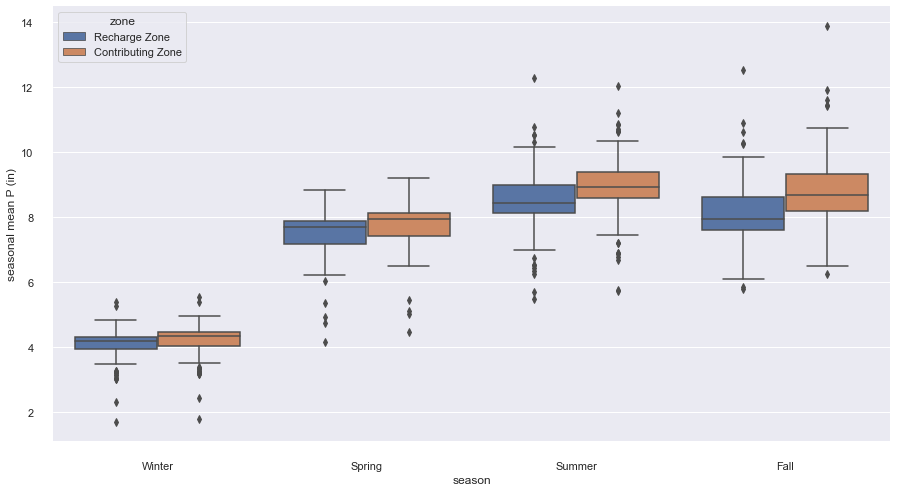

In [29]:
### plot the seasonal mean precipitation at the recharge zone and contributing zone for all the periods and the 20 MACA models with RCP8.5
fig_dims=(15,8)
fig,ax=plt.subplots(figsize=fig_dims)
sns.boxplot(x="season", y="seasonal mean P (in)",
            hue="zone", 
            data=preseasonmean[preseasonmean['rcp']=='rcp85'],ax=ax)
sns.despine(offset=10, trim=True)

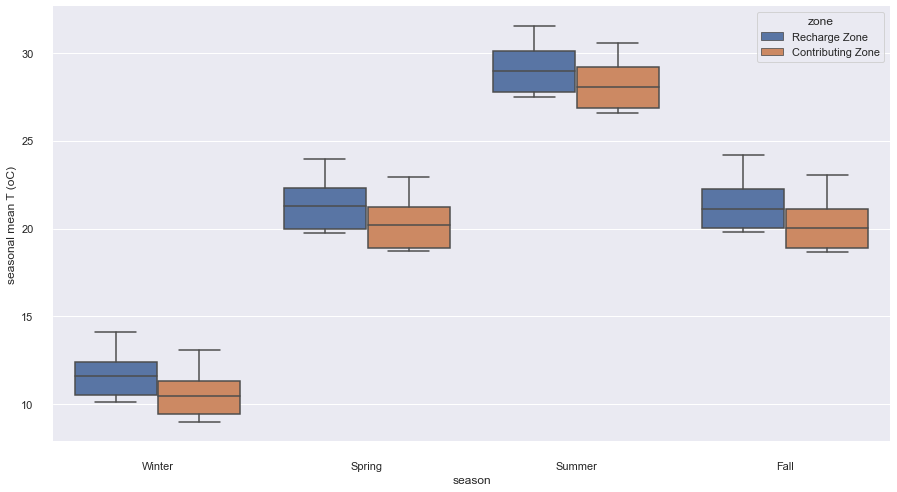

In [30]:
### plot the seasonal mean temperature at the recharge zone and contributing zone for all the periods and the 20 MACA models
fig_dims=(15,8)
fig,ax=plt.subplots(figsize=fig_dims)
sns.boxplot(x="season", y="seasonal mean T (oC)",
            hue="zone", 
            data=tseasonmean[preseasonmean['rcp']=='rcp45'],ax=ax)
sns.despine(offset=10, trim=True)

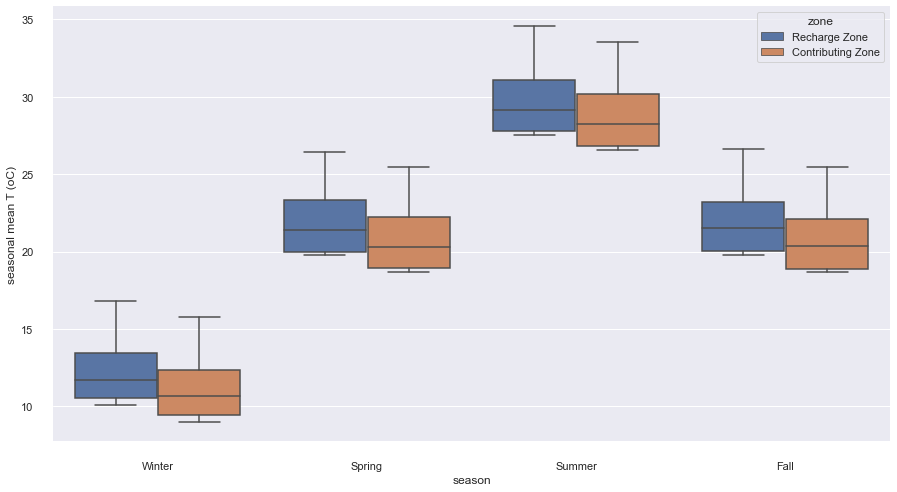

In [31]:
### plot the seasonal mean temperature at the recharge zone and contributing zone for all the periods and the 20 MACA models
fig_dims=(15,8)
fig,ax=plt.subplots(figsize=fig_dims)
sns.boxplot(x="season", y="seasonal mean T (oC)",
            hue="zone", 
            data=tseasonmean[preseasonmean['rcp']=='rcp85'],ax=ax)
sns.despine(offset=10, trim=True)

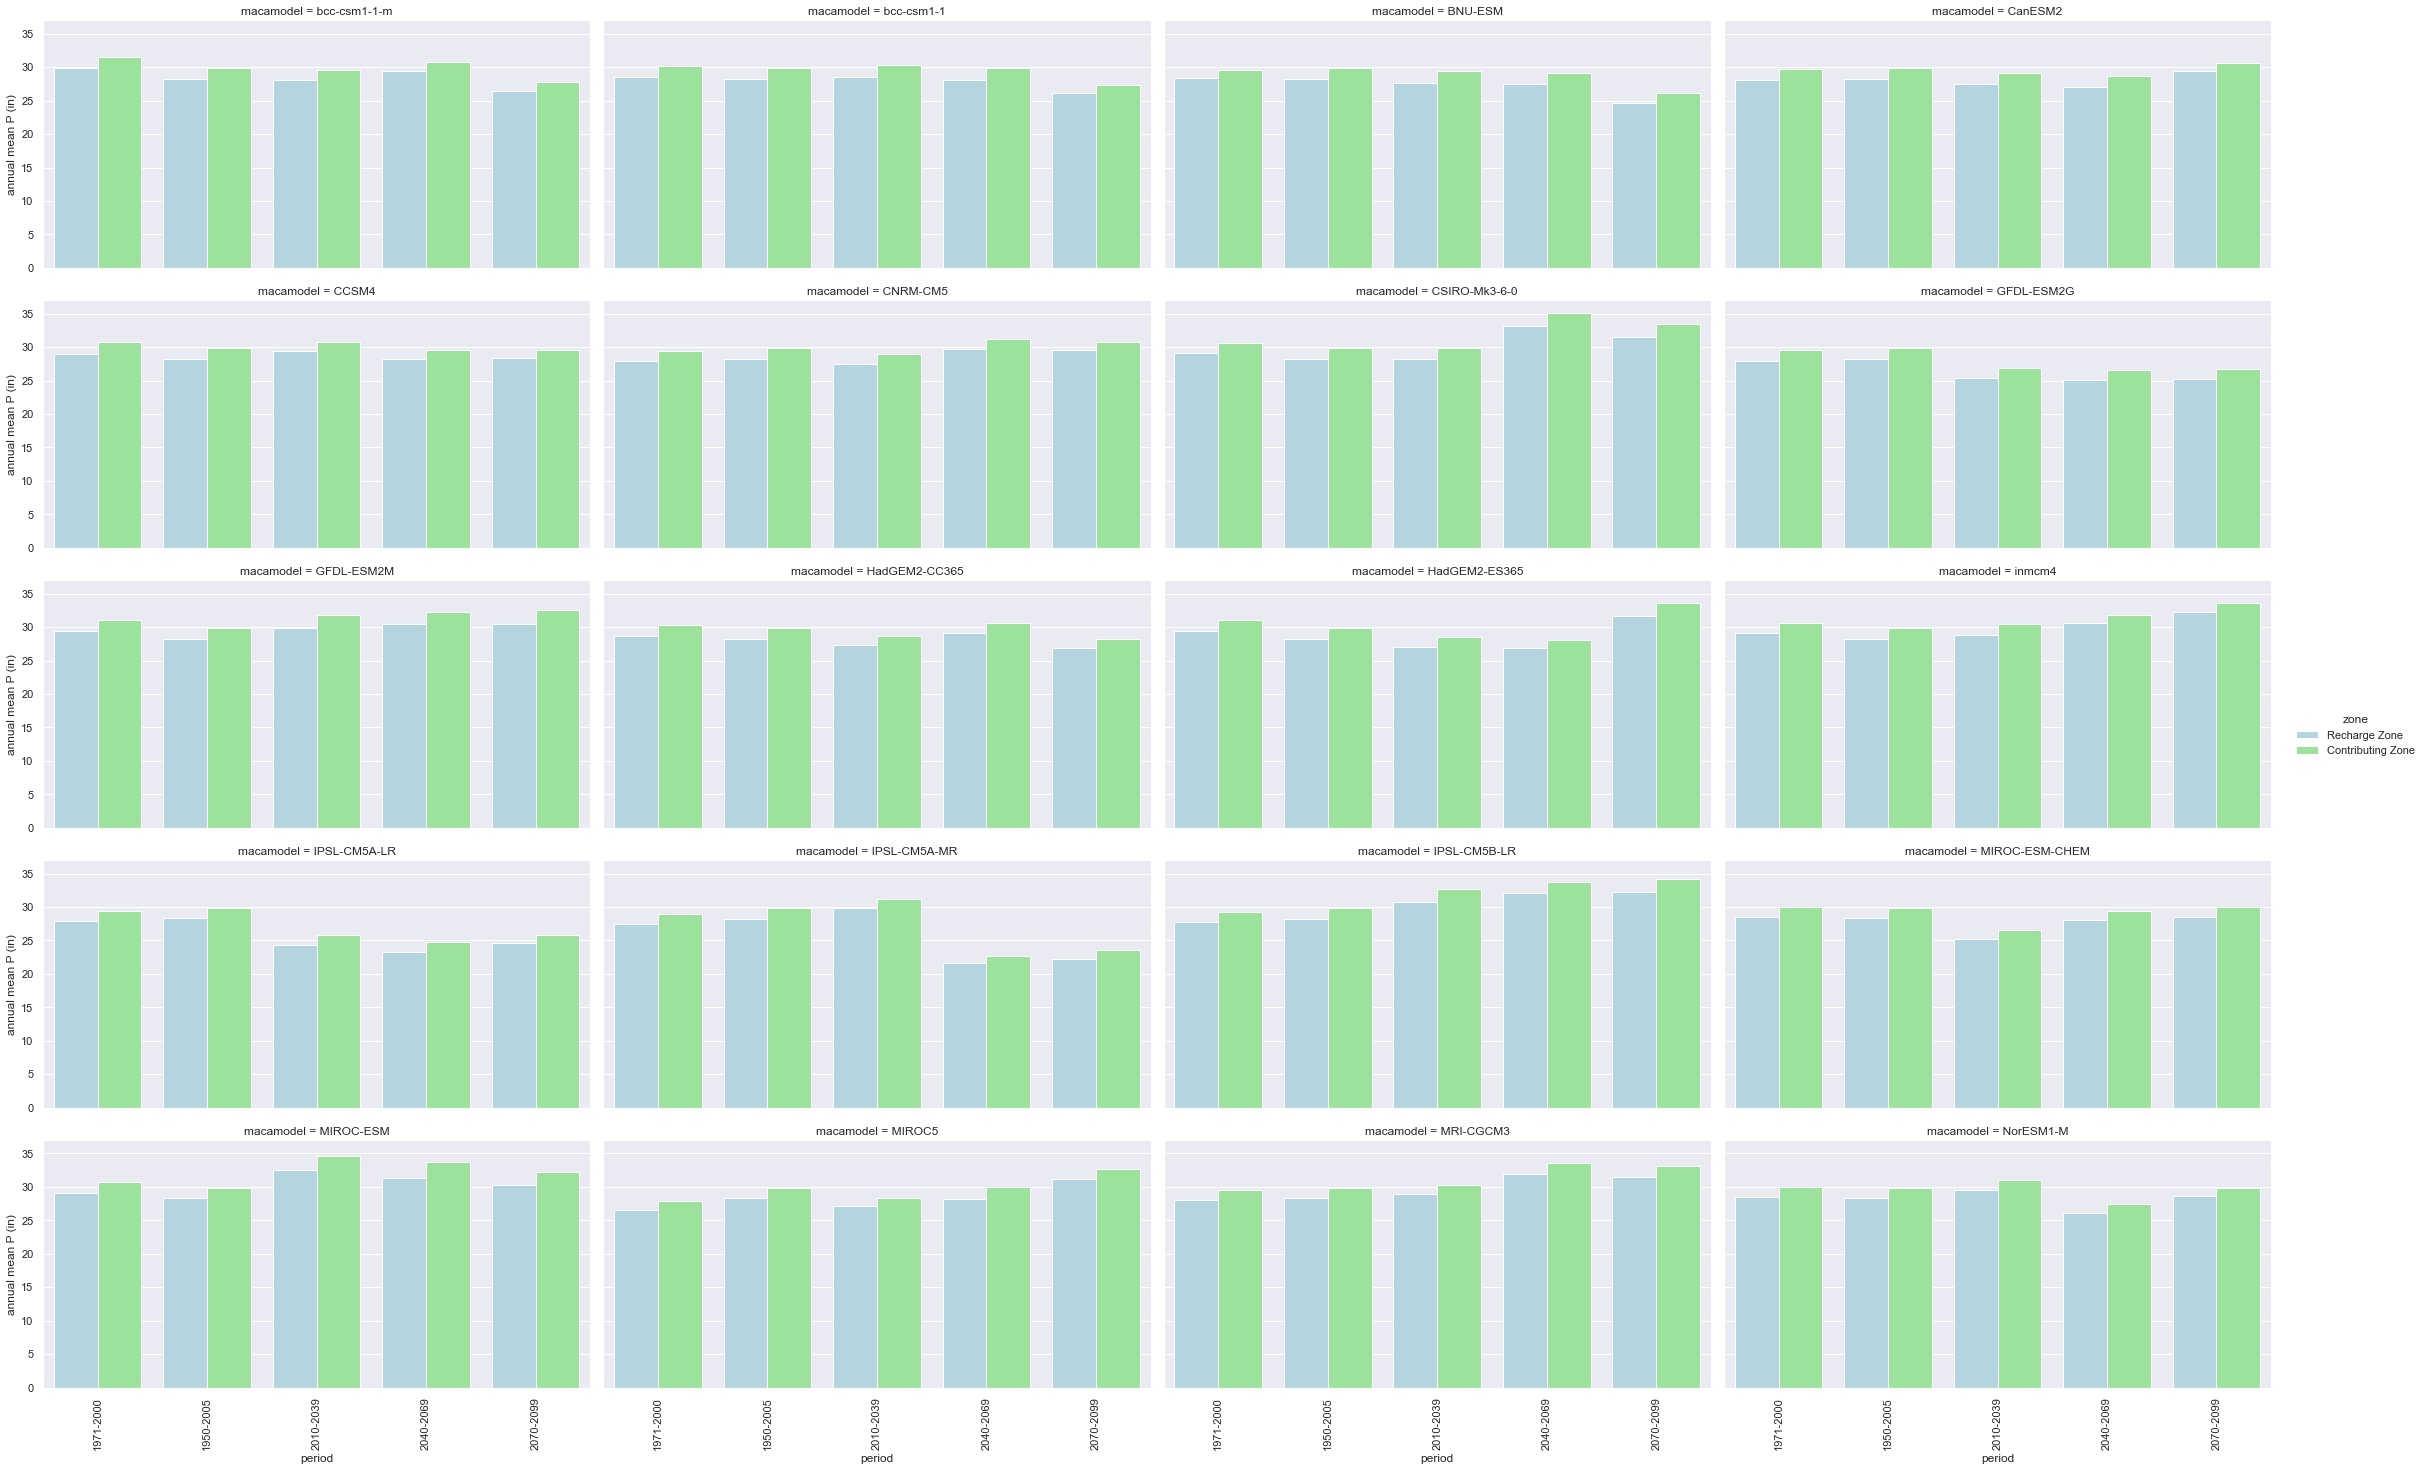

In [32]:
### barplot of the annual precipitaiton at the different periods at the two zones for 20 MACA models with RCP 4.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="annual mean P (in)",kind='bar',
            hue="zone", col='macamodel',col_wrap=4, palette={'lightblue','lightgreen'},
            data=preannualmean[(preannualmean['rcp']=='rcp45')],height=4,aspect=2.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)



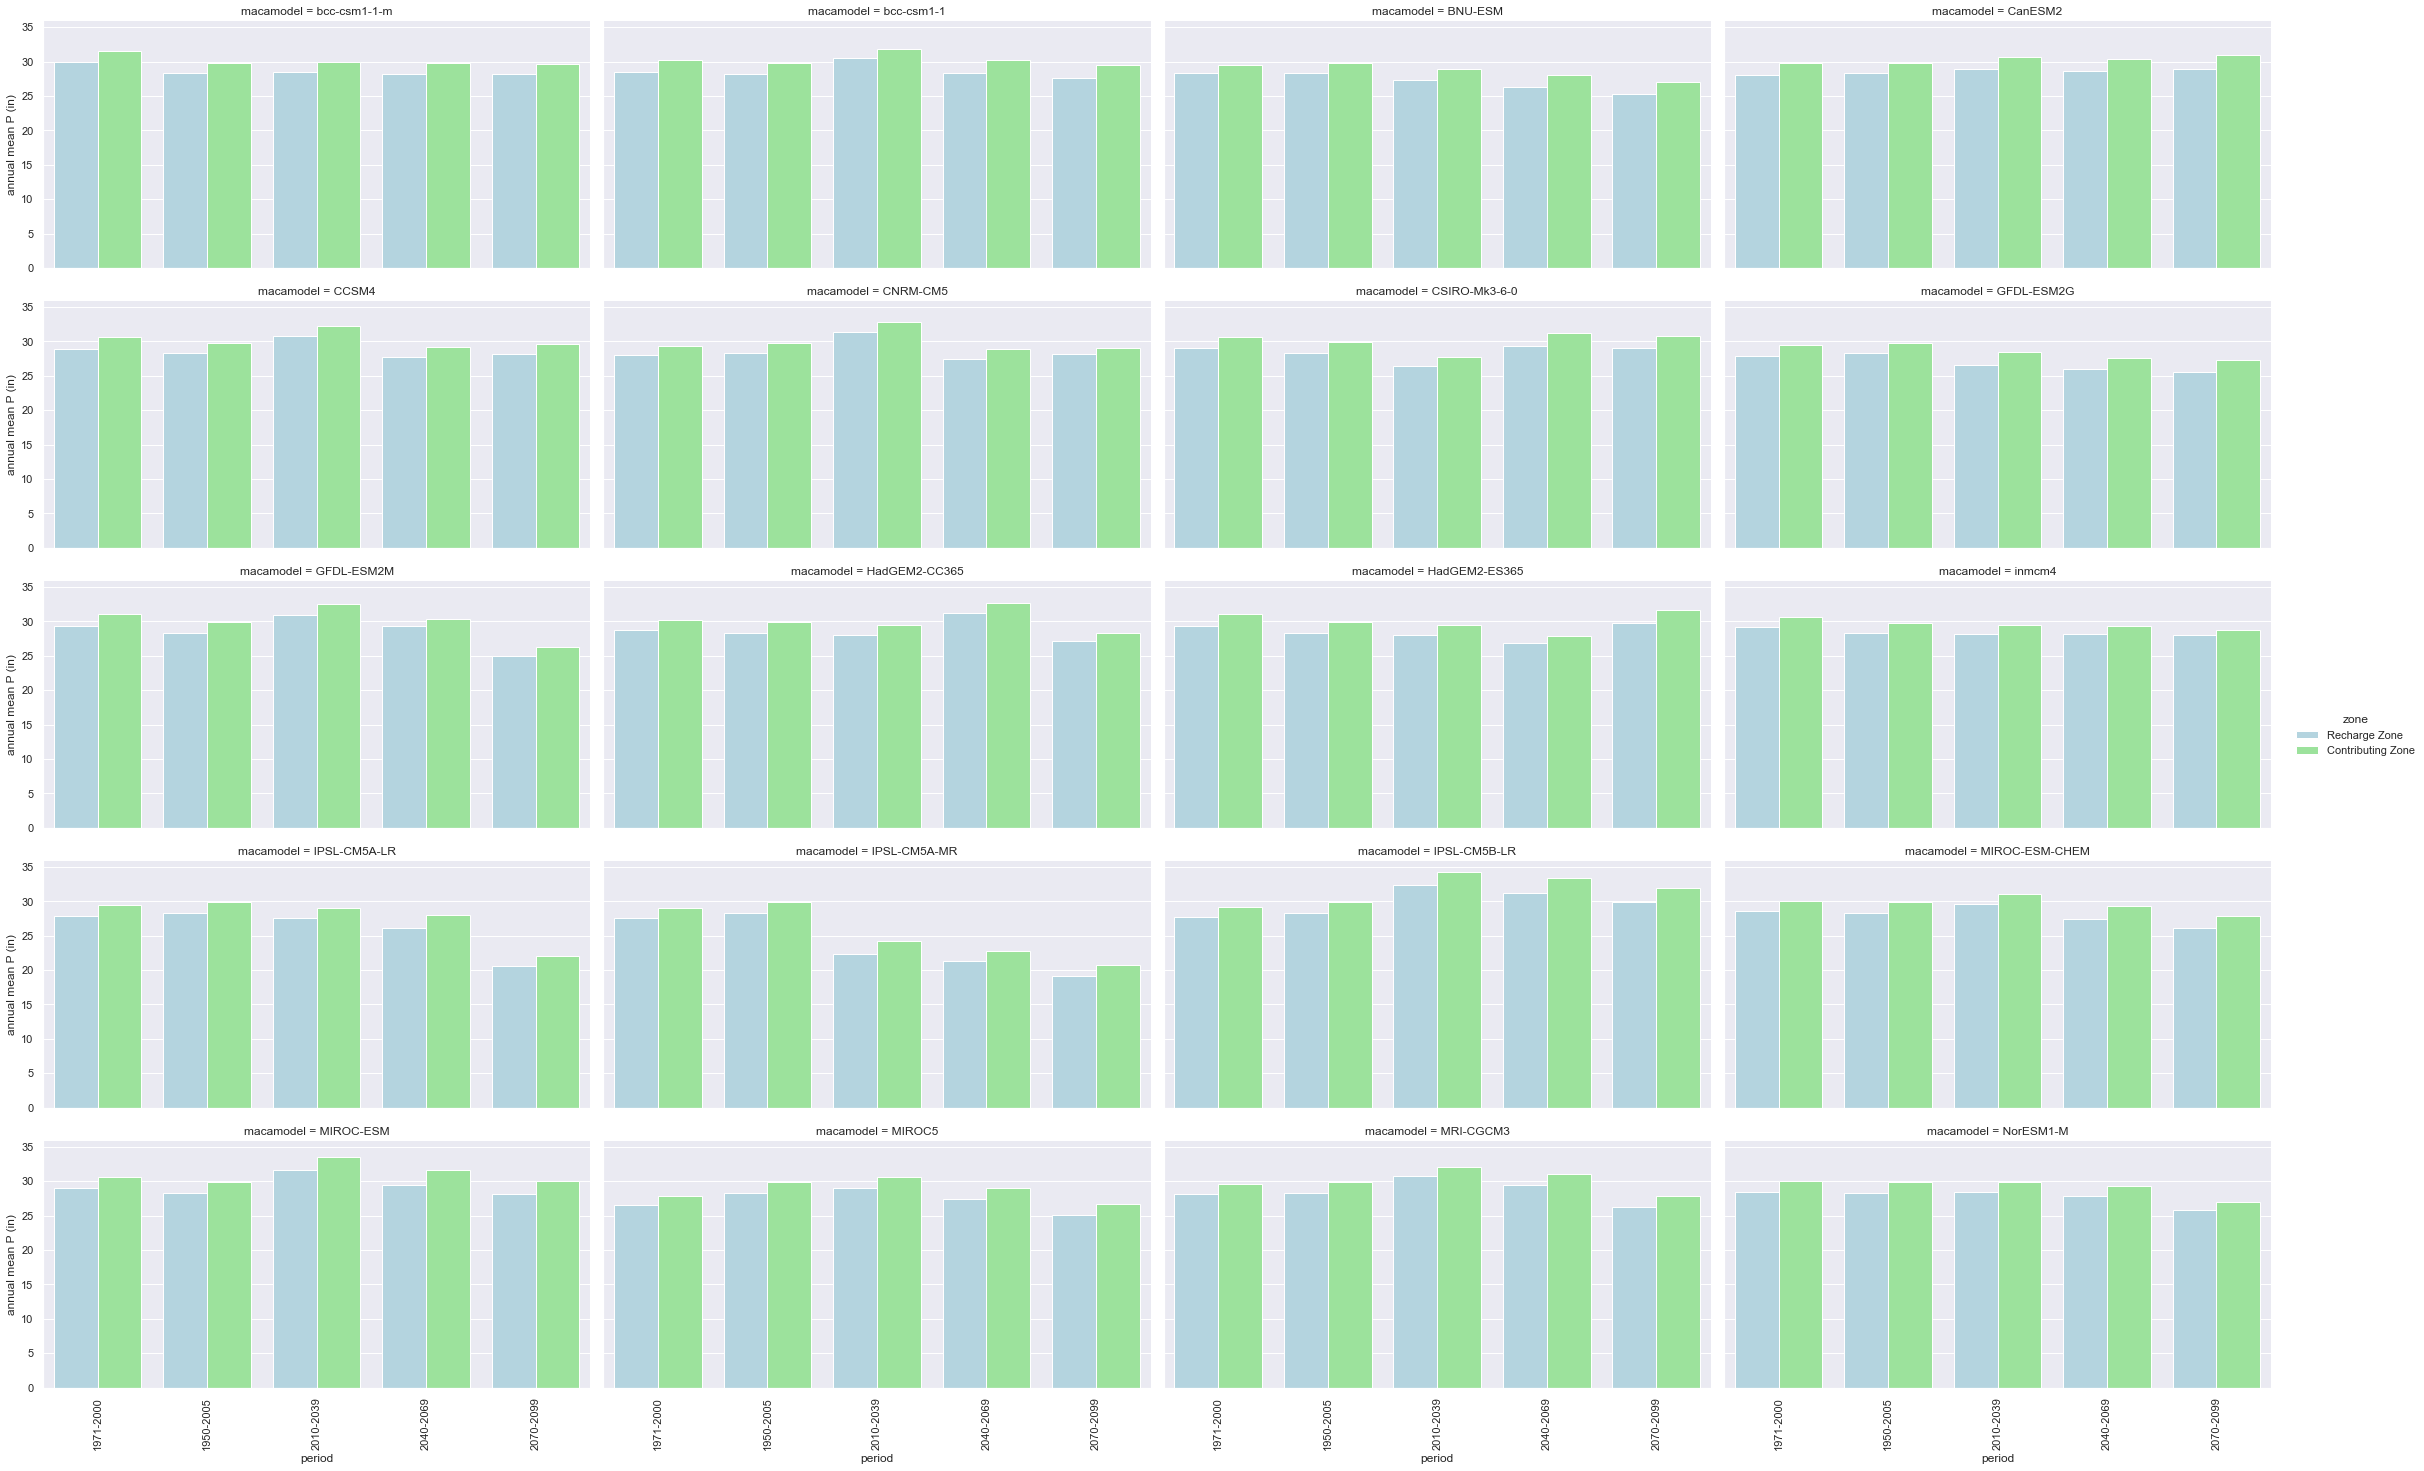

In [33]:
### barplot of the annual precipitaiton at the different periods at the two zones for 20 MACA models with RCP 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="annual mean P (in)",kind='bar',
            hue="zone", col='macamodel',col_wrap=4, palette={'lightblue','lightgreen'},
            data=preannualmean[(preannualmean['rcp']=='rcp85')],height=4,aspect=2.0)
#plt.ylim(-1,1)
#chart.set_alpha(0.5)
chart.set_xticklabels(rotation=90)


In [34]:
tannualmean.head()

,macamodel,rcp,zone,period,annual mean T(oC)
0,bcc-csm1-1-m,rcp45,Recharge Zone,1971-2000,19.595005
1,bcc-csm1-1,rcp45,Recharge Zone,1971-2000,19.570655
2,BNU-ESM,rcp45,Recharge Zone,1971-2000,19.735091
3,CanESM2,rcp45,Recharge Zone,1971-2000,19.632558
4,CCSM4,rcp45,Recharge Zone,1971-2000,19.764522


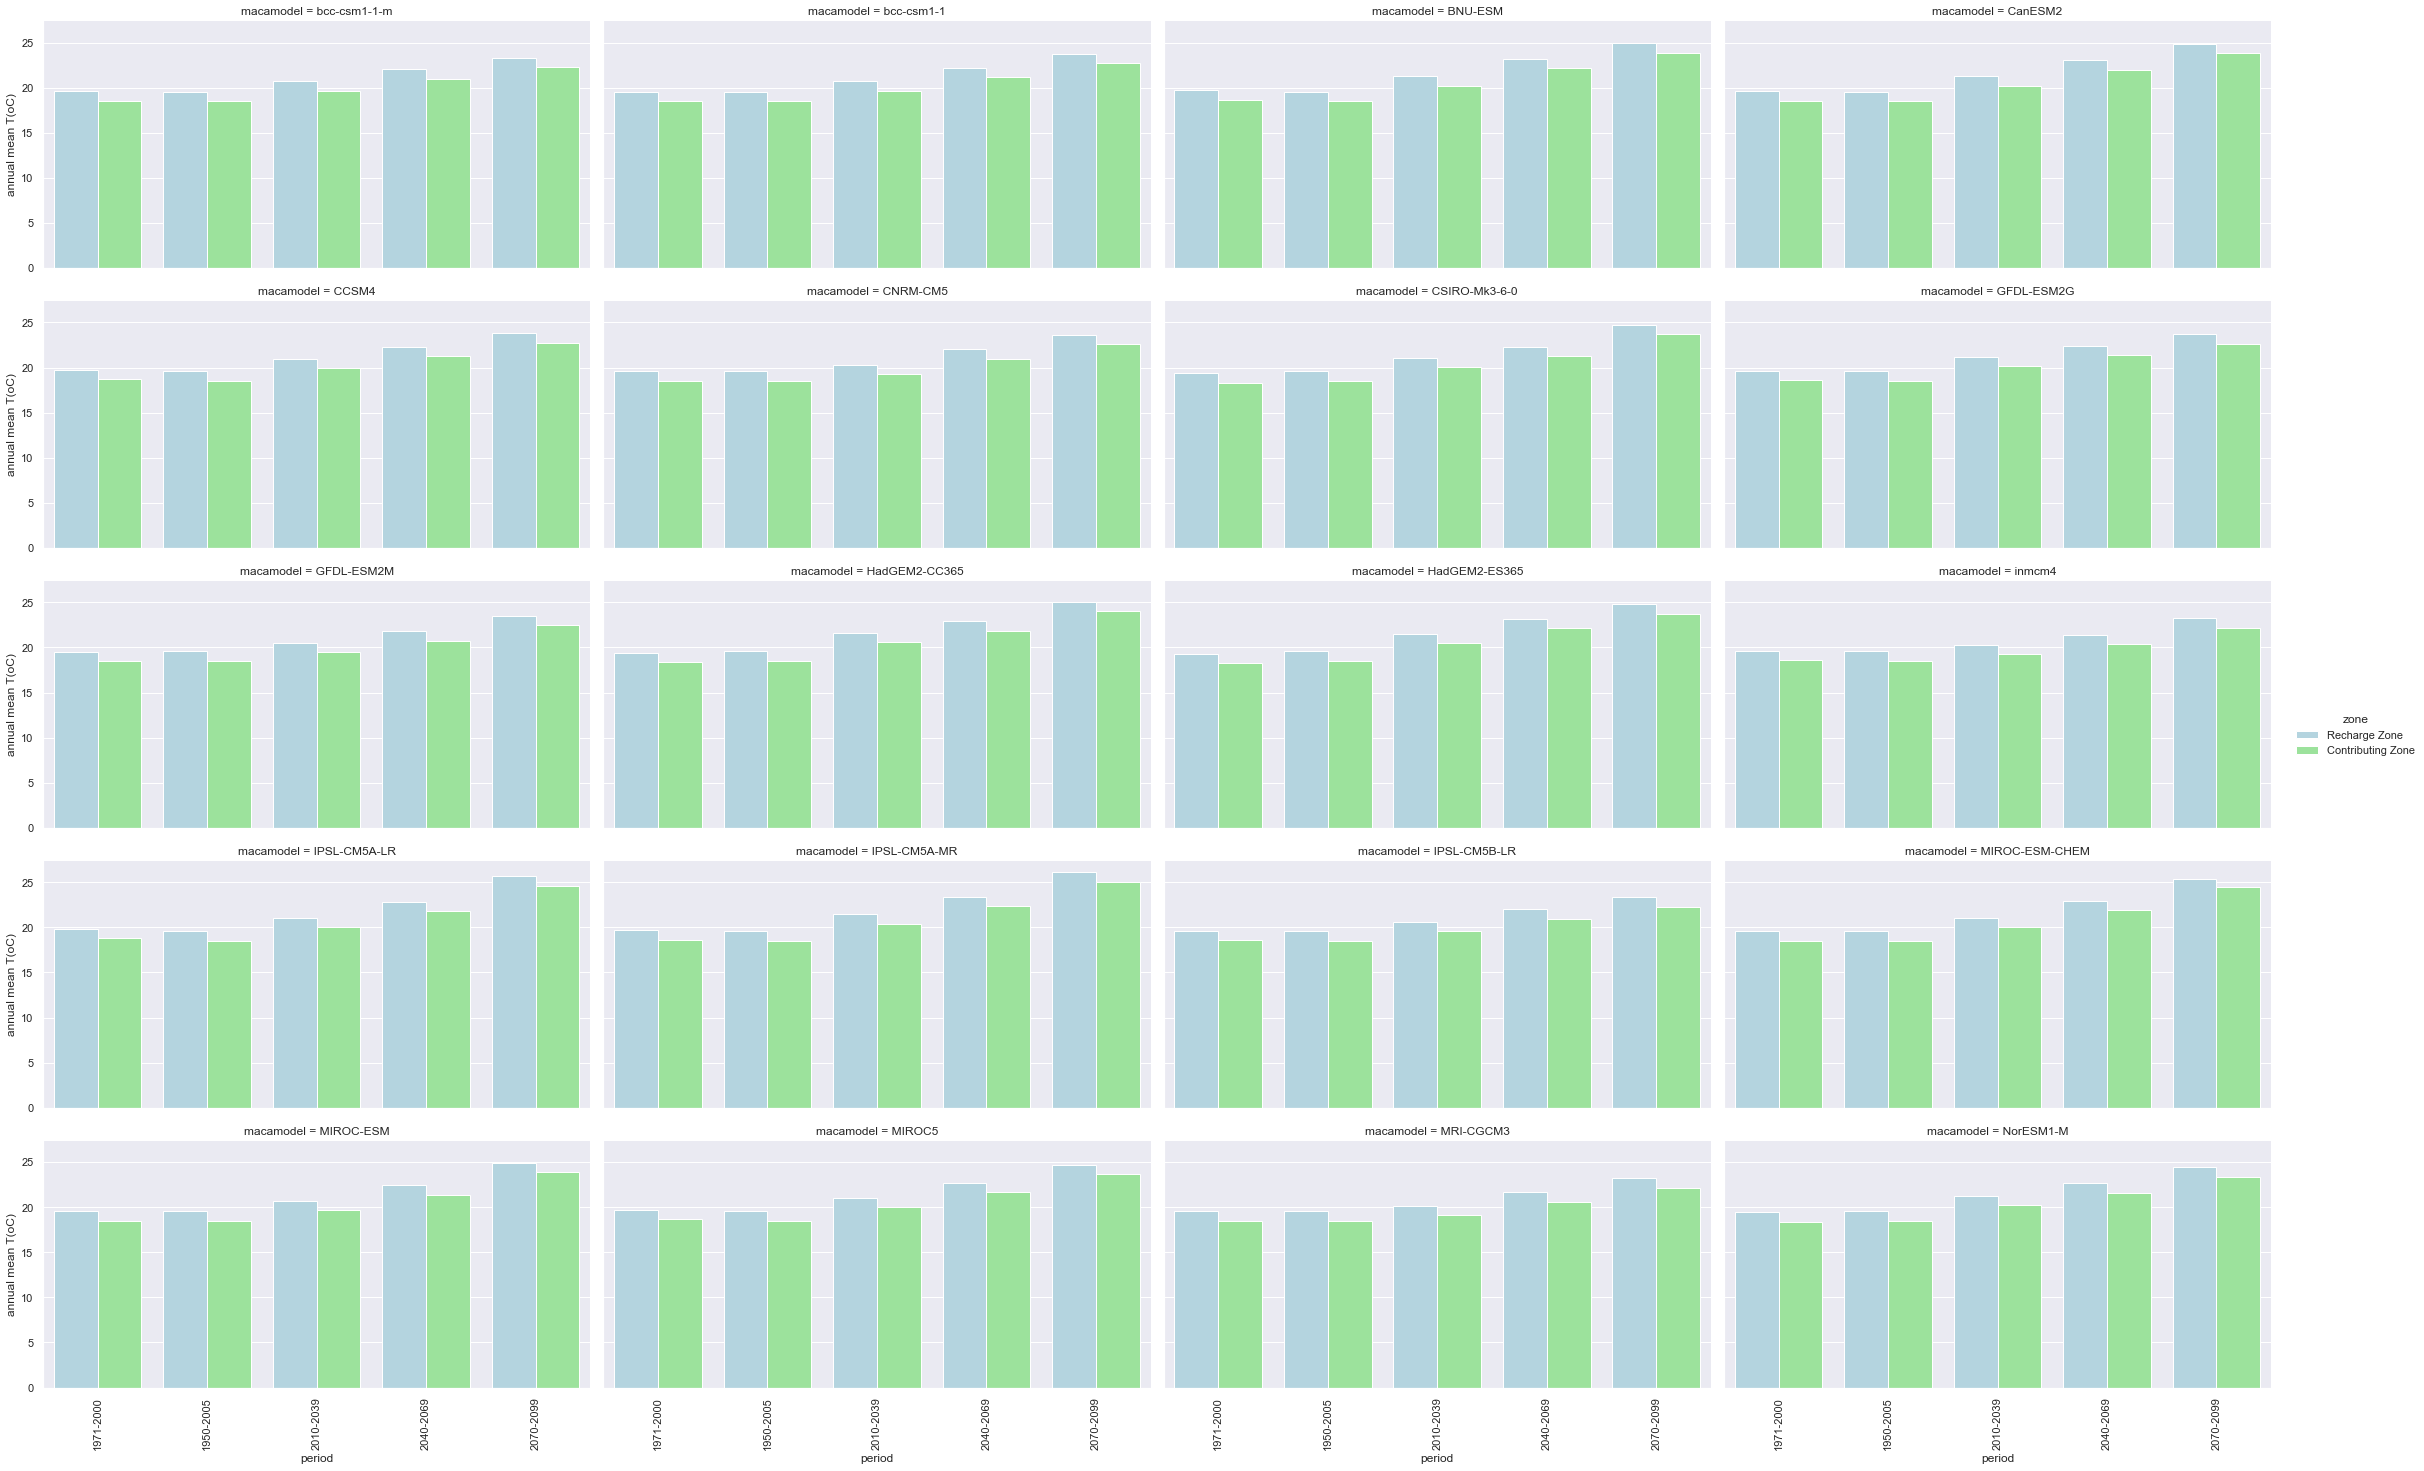

In [35]:
### barplot of the annual temperature at the different periods at the two zones for 20 MACA models with RCP 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="annual mean T(oC)",kind='bar',
            hue="zone", col='macamodel',col_wrap=4, palette={'lightblue','lightgreen'},
            data=tannualmean[(tannualmean['rcp']=='rcp85')],height=4,aspect=2.0)
#plt.ylim(-1,1)

chart.set_xticklabels(rotation=90)

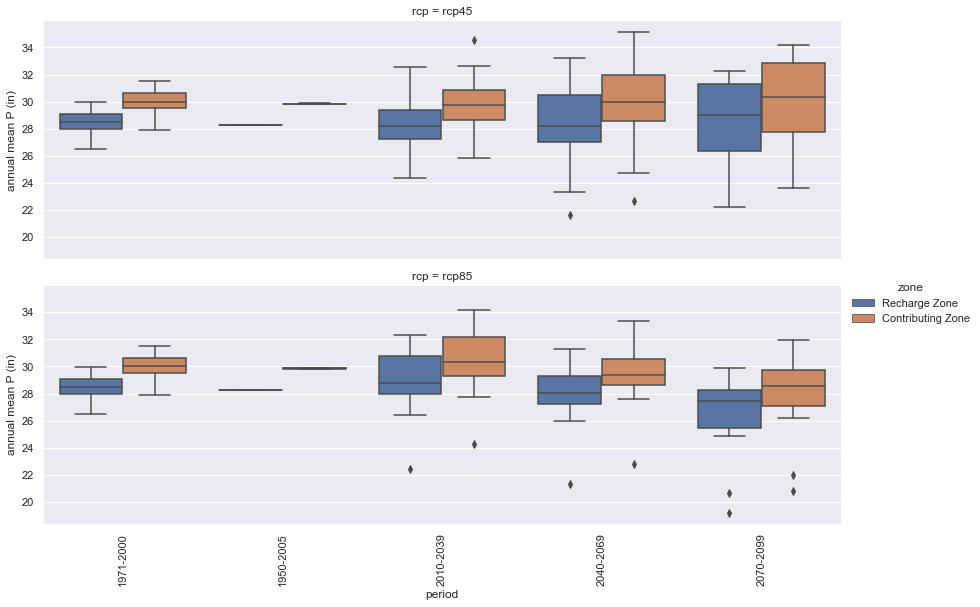

In [36]:
### boxplot of the annual mean precipitation at the recharge and contributinbg zones over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="annual mean P (in)",kind='box',
            hue="zone", col='rcp',col_wrap=1,
            data=preannualmean,height=4,aspect=3.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

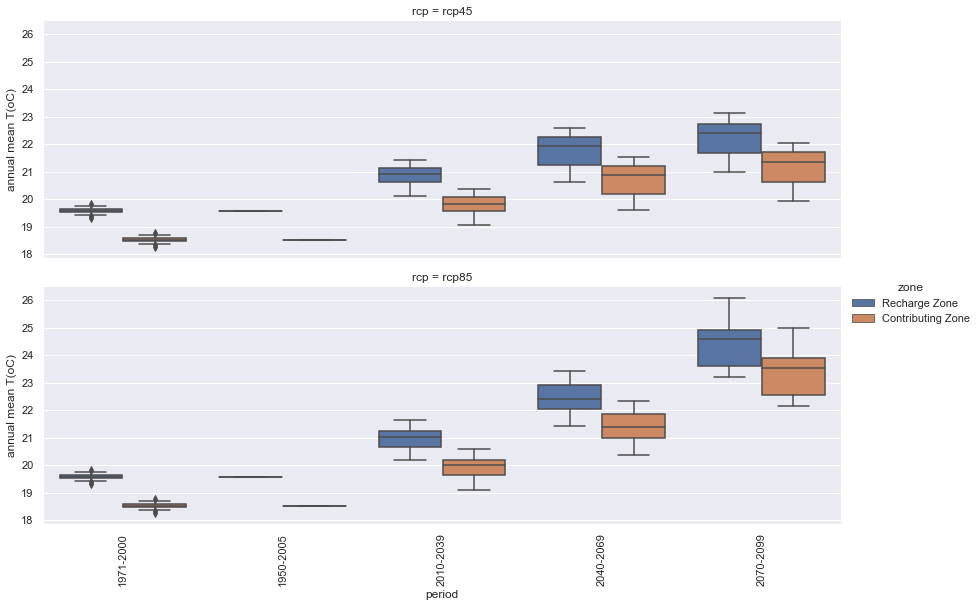

In [37]:
### boxplot of the annual mean Temreterature at the recharge and contributinbg zones over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="annual mean T(oC)",kind='box',
            hue="zone", col='rcp',col_wrap=1,
            data=tannualmean,height=4,aspect=3.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

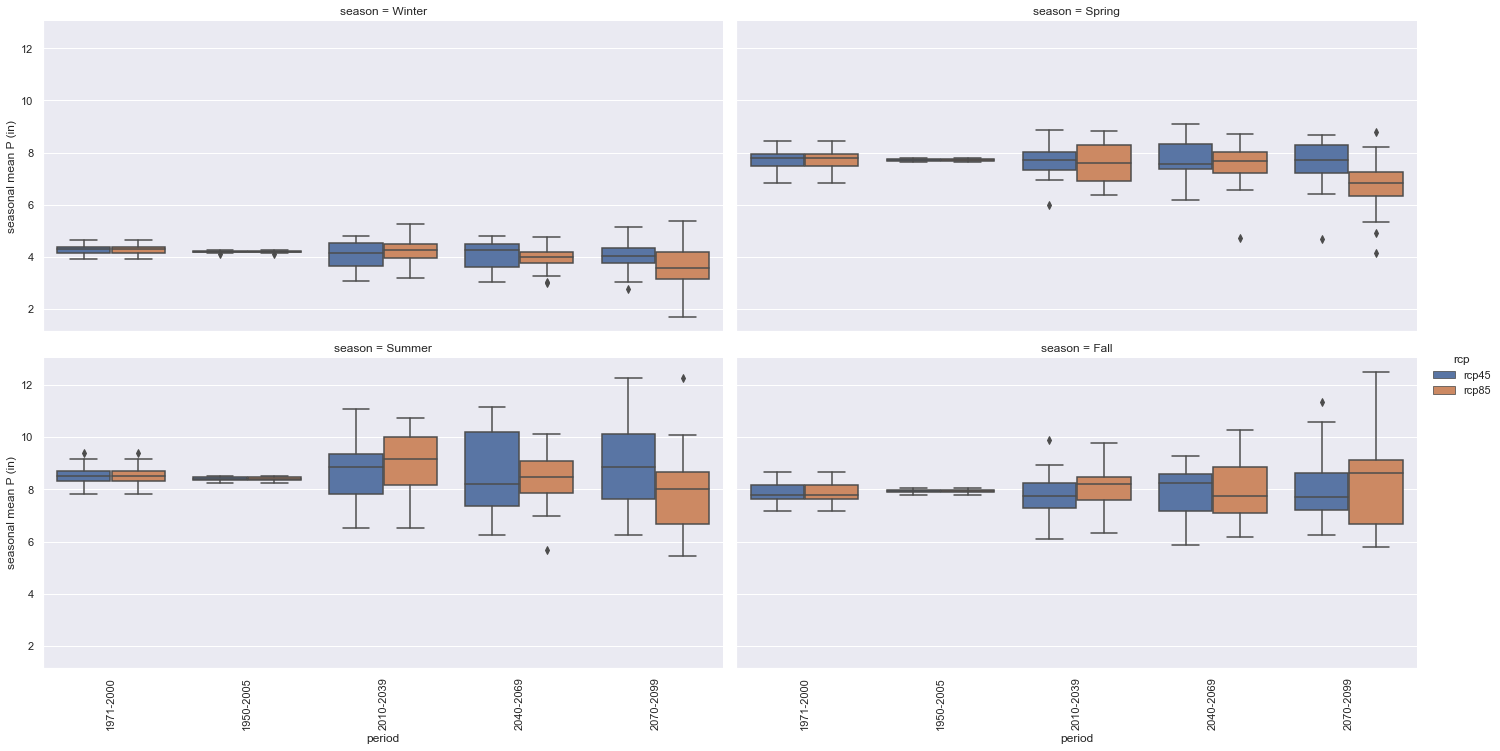

In [38]:
### boxplot of the seasonal mean precipitaiton at the recharge zone over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="seasonal mean P (in)",kind='box',
            hue="rcp", col='season',col_wrap=2,
            data=preseasonmean[preseasonmean['zone']=='Recharge Zone'],height=5,aspect=2.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

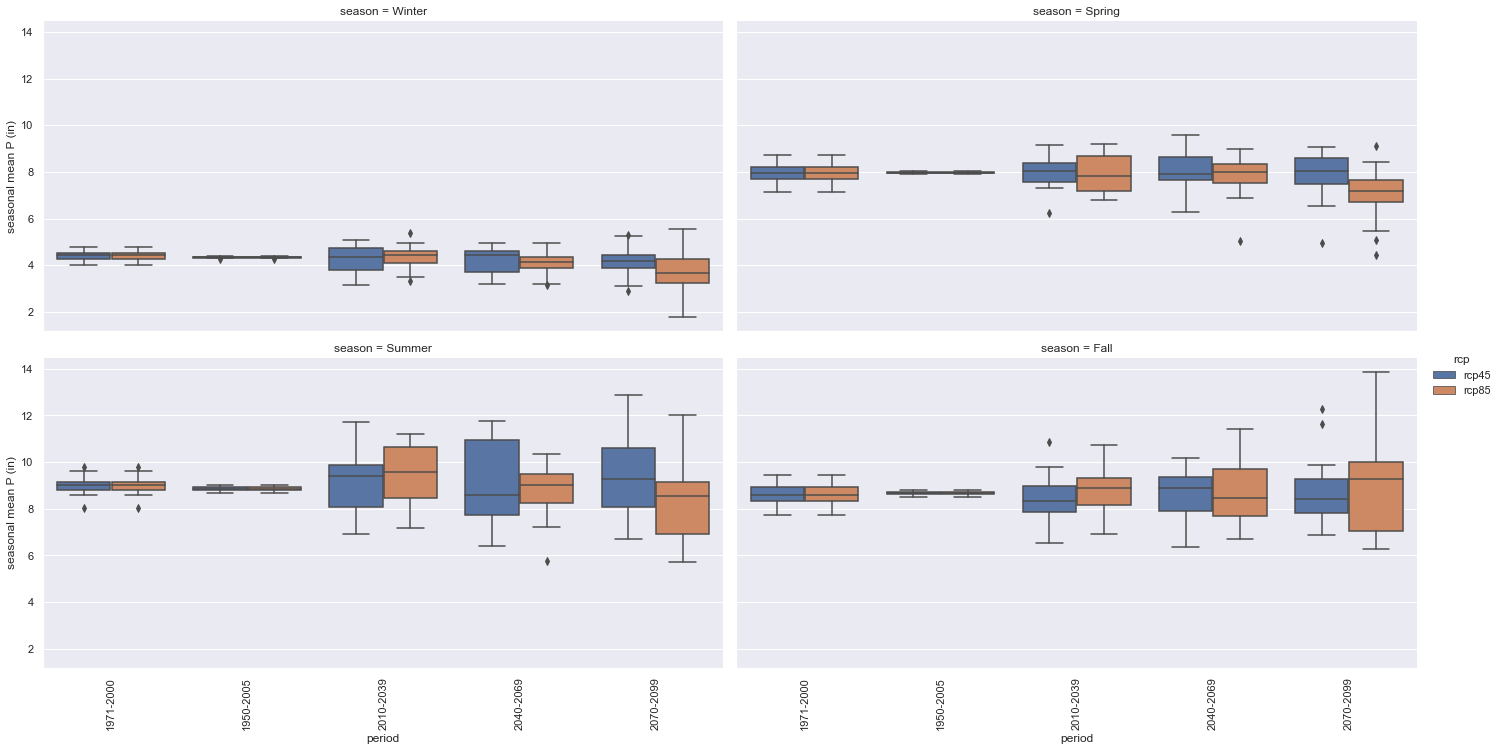

In [39]:
### boxplot of the seasonal mean precipitaiton at the contributing zones over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="seasonal mean P (in)",kind='box',
            hue="rcp", col='season',col_wrap=2,
            data=preseasonmean[preseasonmean['zone']=='Contributing Zone'],height=5,aspect=2.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

In [40]:
tseasonmean.head()

,macamodel,rcp,zone,period,season,seasonal mean T (oC)
0,bcc-csm1-1-m,rcp45,Recharge Zone,1971-2000,Winter,10.647189
1,bcc-csm1-1,rcp45,Recharge Zone,1971-2000,Winter,10.294068
2,BNU-ESM,rcp45,Recharge Zone,1971-2000,Winter,10.822772
3,CanESM2,rcp45,Recharge Zone,1971-2000,Winter,10.626944
4,CCSM4,rcp45,Recharge Zone,1971-2000,Winter,10.819902


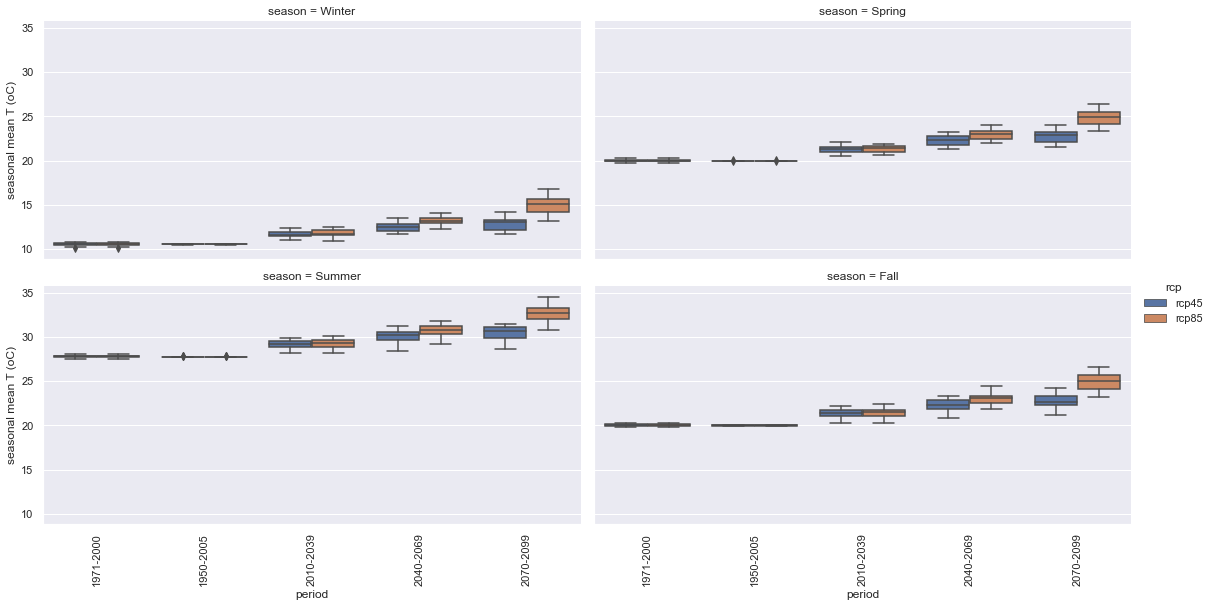

In [41]:
### boxplot of the seasonal mean temerature at the recharge zone over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="seasonal mean T (oC)",kind='box',
            hue="rcp", col='season',col_wrap=2,
            data=tseasonmean[tseasonmean['zone']=='Recharge Zone'],height=4,aspect=2.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

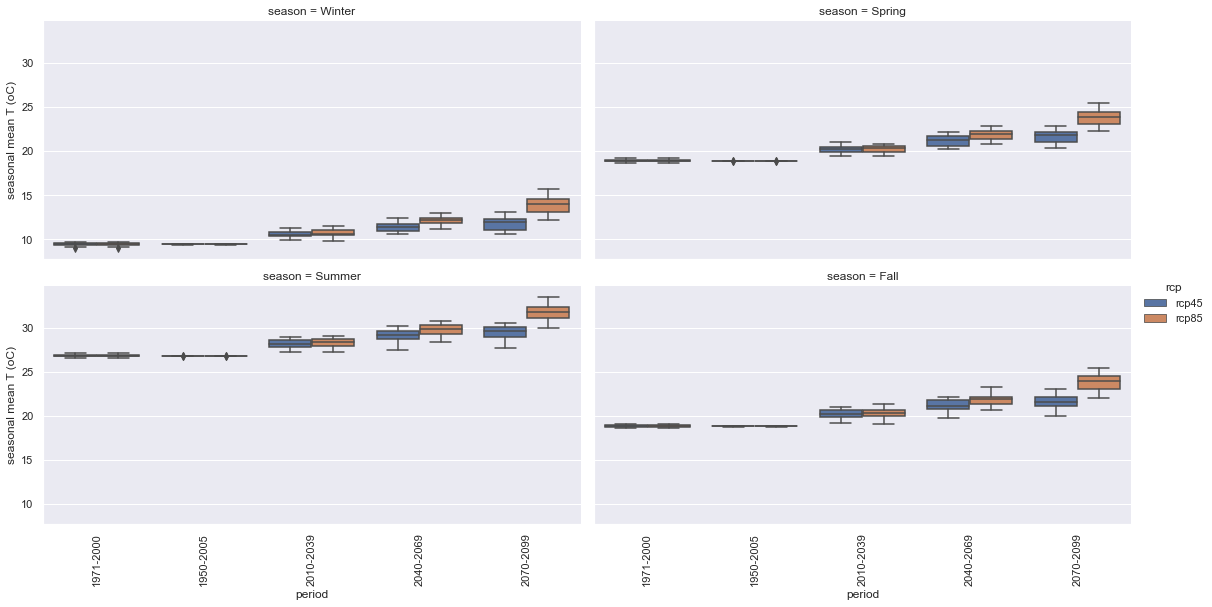

In [42]:
### boxplot of the seasonal mean temerature at the contributing zone over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="seasonal mean T (oC)",kind='box',
            hue="rcp", col='season',col_wrap=2,
            data=tseasonmean[tseasonmean['zone']=='Contributing Zone'],height=4,aspect=2.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

### Section 6.2 Plot the relative change for mean precipitation and temperature

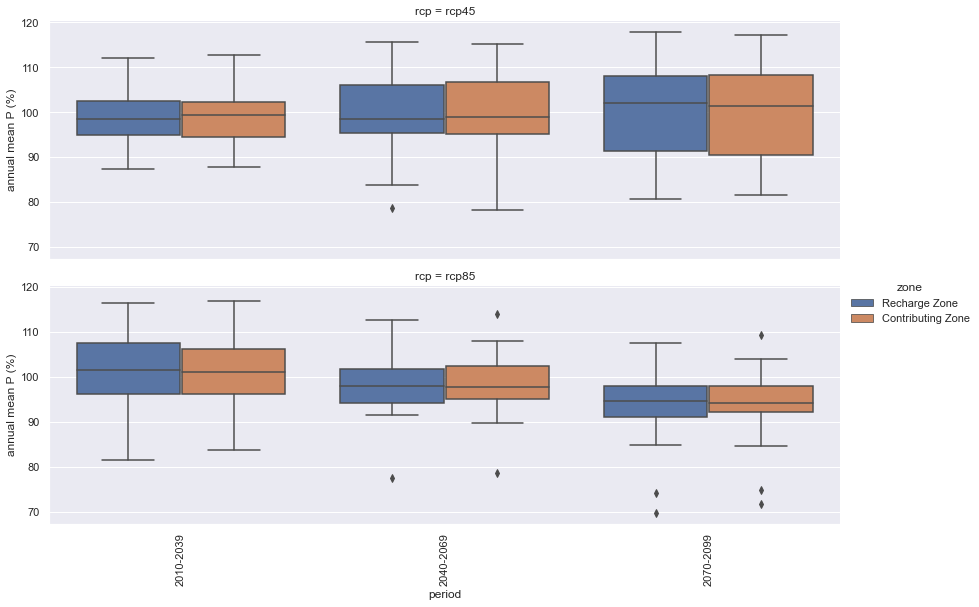

In [43]:
### boxplot of the relative change in relative percentage of annual mean precipitation (future 3 periods / 1971-2000) at the recharge and contributinbg zones over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="annual mean P (%)",kind='box',
            hue="zone", col='rcp',col_wrap=1,
            data=percpreannualmean,height=4,aspect=3.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

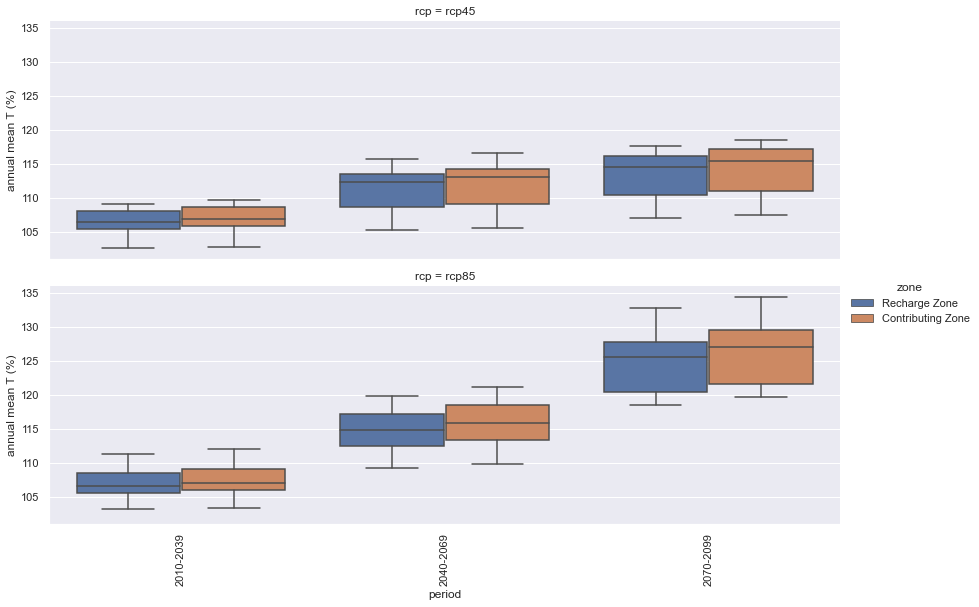

In [44]:
### boxplot of the relative percentages of annual mean temperature (future 3 periods / 1971-2000) at the recharge and contributinbg zones over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="annual mean T (%)",kind='box',
            hue="zone", col='rcp',col_wrap=1,
            data=perctannualmean,height=4,aspect=3.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

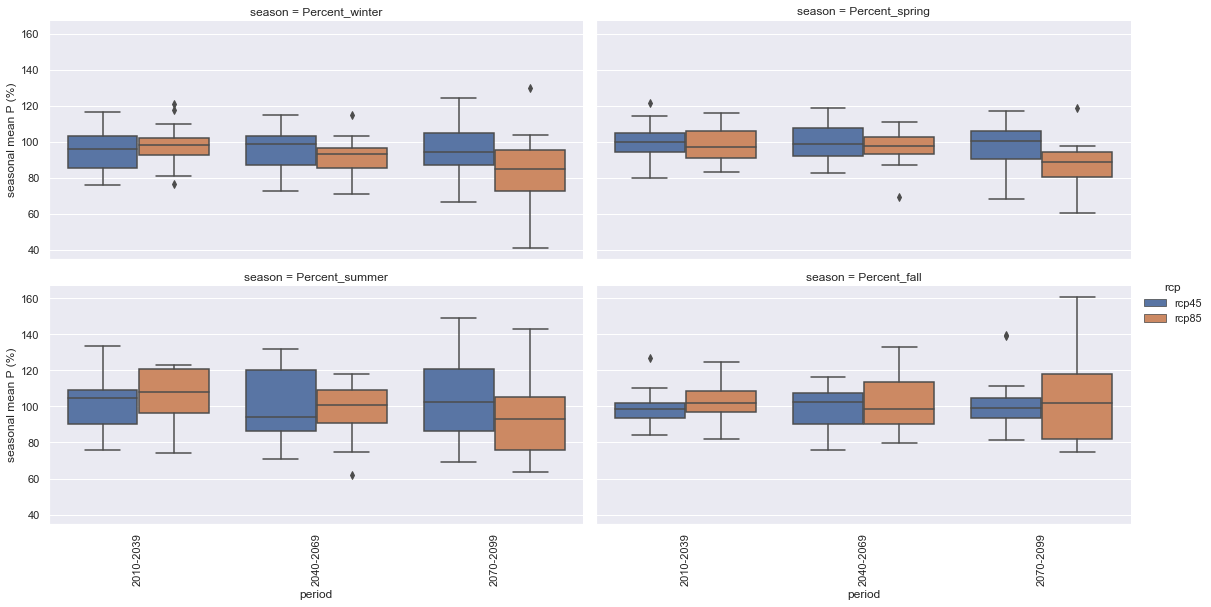

In [45]:

### boxplot of relative percentage of the seasonal mean precipitation (future 3 periods / 1971-2000) at the recharge zone over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="seasonal mean P (%)",kind='box',
            hue="rcp", col='season',col_wrap=2,
            data=percpreseasonmean[percpreseasonmean['zone']=='Recharge Zone'],height=4,aspect=2.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

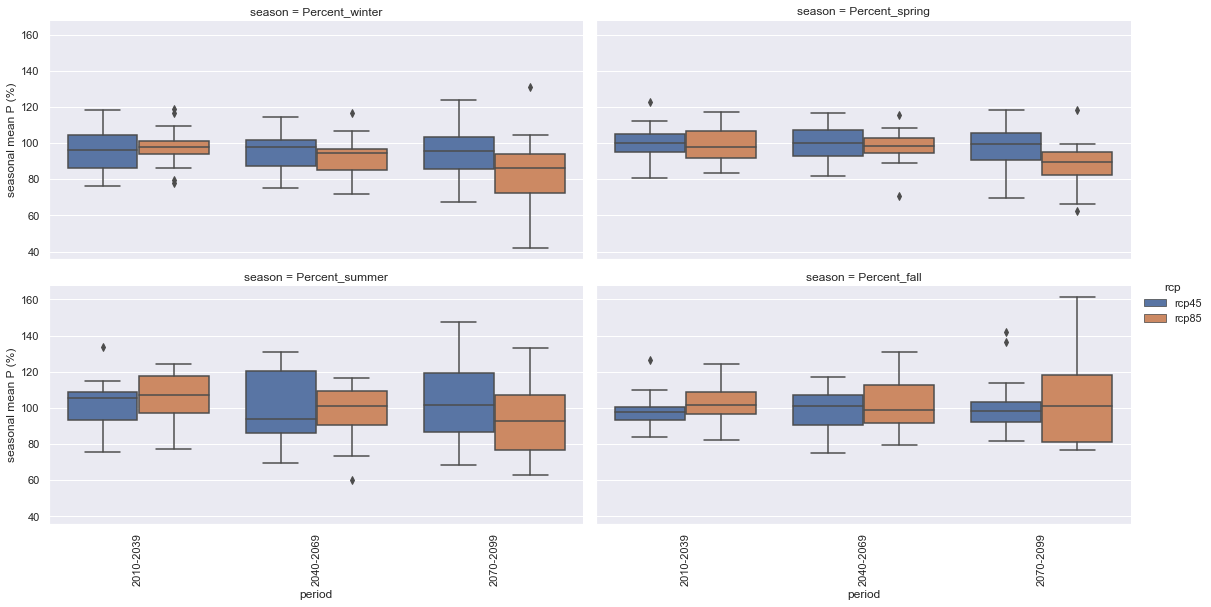

In [46]:

### boxplot of relative percentage of the seasonal mean precipitation (future 3 periods / 1971-2000) at the contributing zone over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="seasonal mean P (%)",kind='box',
            hue="rcp", col='season',col_wrap=2,
            data=percpreseasonmean[percpreseasonmean['zone']=='Contributing Zone'],height=4,aspect=2.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

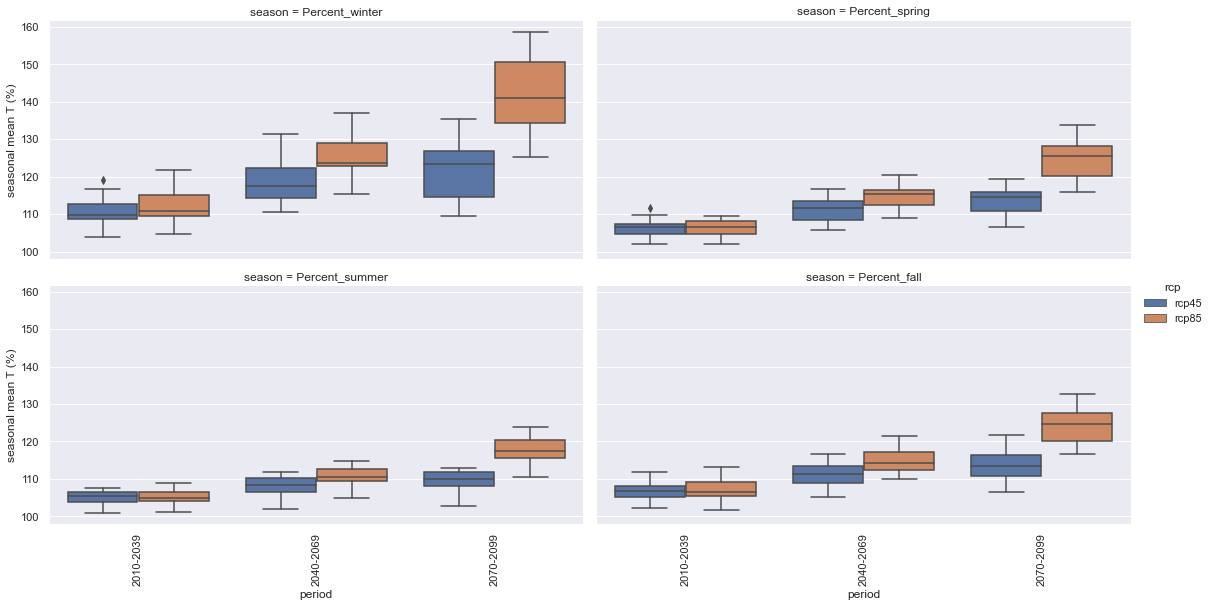

In [47]:

### boxplot of relative percentage of the seasonal mean temerature (future 3 periods / 1971-2000) at the Recharge zone over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="seasonal mean T (%)",kind='box',
            hue="rcp", col='season',col_wrap=2,
            data=perctseasonmean[perctseasonmean['zone']=='Recharge Zone'],height=4,aspect=2.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)

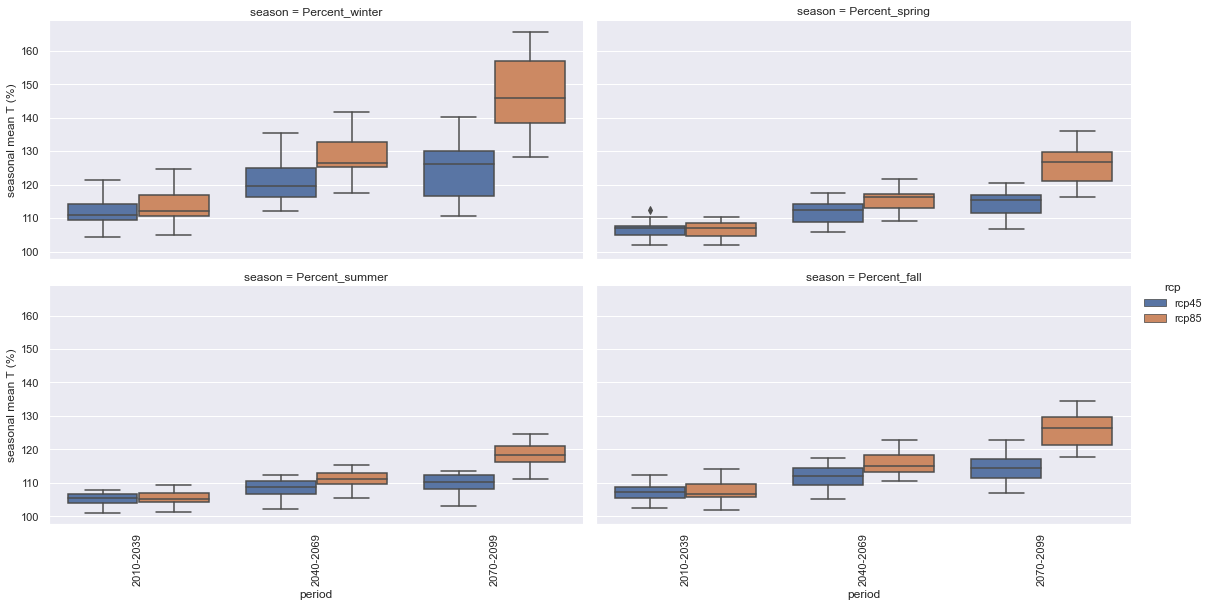

In [48]:

### boxplot of relative percentage of the seasonal mean temerature (future 3 periods / 1971-2000) at the contributing zone over the 20 MACA GCMs for rcp 4.5 and rcp 8.5

fig_dims=(25,10)
#fig,ax=plt.subplots(figsize=fig_dims)

chart=sns.catplot(x="period", y="seasonal mean T (%)",kind='box',
            hue="rcp", col='season',col_wrap=2,
            data=perctseasonmean[perctseasonmean['zone']=='Contributing Zone'],height=4,aspect=2.0)
#plt.ylim(-1,1)
chart.set_xticklabels(rotation=90)